# ***Assignment No. 1 (Question no. 1)***

## **Task**: To predict the Genus of frogs given a set of MFCC features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.tree import DecisionTreeClassifier

In [2]:
#importing dataset
df = pd.read_csv("/content/Q1Data.csv")
df.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_9,MFCCs_10,...,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,Family,Genus,Species
0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,0.188654,...,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre
1,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,0.270958,...,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre
2,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,0.266064,...,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre
3,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,0.267279,...,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre
4,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,0.332695,...,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre


##***Decision Tree***

## from Scrach

In [3]:
# splitting into test train
# df = df.sample(frac=0.6, random_state=5613)
X = df[['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3', 'MFCCs_ 4', 'MFCCs_ 5', 'MFCCs_ 6']].values
y = df['Genus']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
# X = X[:1000]
# y = y[:1000]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=123)

In [4]:
#=========================Internal Structure of each node ====================================
class Node:
    def __init__(self, value=None, features=None, th=None, left=None, right=None):
        self.left = left
        self.right = right
        self.features = features
        self.th = th
        self.value = value

In [5]:
class DecisionTree:

    def __init__(self, min_records=2, max_depth=100, feature_cnt=None):
        self.min_records = min_records
        self.max_depth = max_depth
        self.feature_cnt = feature_cnt
        self.default_label = None
        self.root=None

    def fit(self, X, y):
        self.default_label = Counter(y).most_common(1)[0][0]
        self.root = self._build(X, y, 0)


    def predict(self, X):
        predicted = []
        for record in X:
            predicted.append(self._search(record, self.root))
        return np.array(predicted)

  #======================== Helper Functions ===================================

    def _search(self, x, root):
        if root.left == None and root.right == None:
            return root.value
        if root.th >= x[root.features]:
            return self._search(x, root.left)
        else:
            return self._search(x, root.right)

    def _build(self, X, y, depth=0):
        labels_cnt = len(np.unique(y))
        record_cnt, feats_cnt = X.shape

        # To avoid overfitting, control depth
        if depth >= self.max_depth or record_cnt < self.min_records or labels_cnt == 1:
            counter = Counter(y)
            # If y is empty, use the default label
            value = counter.most_common(1)[0][0] if counter else self.default_label
            return Node(value)

        feat_indexs = np.random.choice(feats_cnt, min(self.feature_cnt, feats_cnt), replace=False)
        best_feature, best_th = self._bestSplit(X, y, feat_indexs)

        left_indexs, right_indexs = self._split(X[:, best_feature], best_th)

        # Building recursively
        left = self._build(X[left_indexs, :], y[left_indexs], depth+1)
        right = self._build(X[right_indexs, :], y[right_indexs], depth+1)
        return Node(None, best_feature, best_th, left, right)

    # def _build(self, X, y, depth=0):
    #     labels_cnt = len(np.unique(y))
    #     record_cnt, feats_cnt = X.shape

    #     # #due to overfitting control depth
    #     # if depth >= self.max_depth:
    #     #     return Node(value, None, None, None, None)

    #     # #Stop if Pure Node
    #     # if labels_cnt == 1:
    #     #     return Node(value, None, None, None, None)

    #     # #to avoid noce
    #     # if record_cnt < self.min_records:
    #     #     return Node(value, None, None, None, None)
    #     if depth >= self.max_depth or record_cnt < self.min_records or labels_cnt == 1:
    #         counter = Counter(y)
    #         value = counter.most_common(1)[0][0]
    #         return Node(value, None, None, None, None)

    #     feat_indexs = np.random.choice(feats_cnt, min(self.feature_cnt, feats_cnt), replace=False)
    #     best_feature, best_th = self._bestSplit(X, y, feat_indexs)

    #     left_indexs, right_indexs = self._split(X[:, best_feature], best_th)

    #     #building recursively
    #     left = self._build(X[left_indexs, :], y[left_indexs], depth+1)
    #     right = self._build(X[right_indexs, :], y[right_indexs], depth+1)
    #     return Node(None, best_feature, best_th, left, right)

    #chosing best feature to split with th
    def _bestSplit(self, X, y, features_indexs):
        split_index, split_th = None, None
        info_gain = -10000000000

        #for each potential feature
        for col_indexes in features_indexs:
            X_cols = X[:, col_indexes]
            all_th = np.unique(X_cols)

            #due to numerical features iterating and cheking high info gain
            for th_ in all_th:
                gain = self._infoGain(y, X_cols, th_)
                if gain > info_gain:
                    info_gain = gain
                    split_index = col_indexes
                    split_th = th_
        return split_index, split_th

    #split the node into 2 parts
    def _split(self, X_cols, split_th):
        temp = np.argwhere(X_cols <= split_th)
        left_part = temp.flatten()
        temp1 = np.argwhere(X_cols > split_th)
        right_part = temp1.flatten()
        return left_part, right_part


    def _infoGain(self, y, X_col, th):
        # parent's entropy before split
        parent = -np.sum([p * np.log(p) for p in (np.bincount(y)/len(y)) if p>0])

        left_indexs, right_indexs = self._split(X_col, th)
        if len(left_indexs) == 0:
            return 0
        if len(right_indexs) == 0:
            return 0

        l_len = len(left_indexs)
        r_len = len(right_indexs)
        l_entropy = -np.sum([p * np.log(p) for p in (np.bincount(y[left_indexs])/len(y)) if p>0])
        r_entropy = -np.sum([p * np.log(p) for p in (np.bincount(y[right_indexs])/len(y)) if p>0])

        #weighted sum of left and right part
        child = (l_len/len(y)) * l_entropy + (r_len/len(y)) * r_entropy
        return (parent - child)

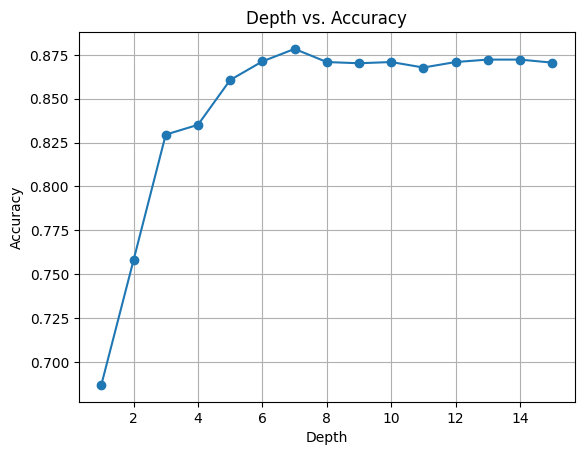

In [6]:
depths = list(range(1, 16))
depth_vs_accuracy1 = {}
for depth in range(1, 16):
    tree_classifier = DecisionTree(5, depth, 21)
    tree_classifier.fit(X_train, y_train)

    # prediction
    predictions = tree_classifier.predict(X_test)

    # Calculate accuracy
    correct = 0
    for i in range(len(predictions)):
        if(predictions[i] == y_test[i]):
            correct += 1
    if len(predictions) != 0:
        accuracy_test = correct/len(predictions)
        depth_vs_accuracy1[depth] = accuracy_test

accuracies = list(depth_vs_accuracy1.values())


depths = list(depth_vs_accuracy1.keys())
plt.plot(depths, accuracies, marker='o', linestyle='-')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('Depth vs. Accuracy')
plt.grid(True)
plt.show()


## Decision Tree with Sklearn

In [7]:
#importing dataset
df = pd.read_csv("/content/Q1Data.csv")
# splitting into test train
# df = df.sample(frac=0.6, random_state=5613)
X = df[['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3', 'MFCCs_ 4', 'MFCCs_ 5', 'MFCCs_ 6']].values
y = df['Genus']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
# X = X[:1000]
# y = y[:1000]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

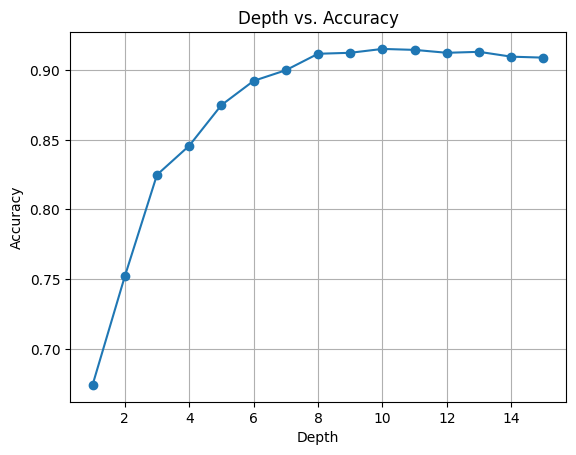

In [8]:
depths = list(range(1, 16))
depth_vs_accuracy2 = []

for depth in depths:
    dt_classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_classifier.fit(X_train, y_train)
    dt_predictions = dt_classifier.predict(X_test)
    dt_accuracy = accuracy_score(y_test, dt_predictions)
    depth_vs_accuracy2.append(dt_accuracy)

plt.plot(depths, depth_vs_accuracy2, marker='o', linestyle='-')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('Depth vs. Accuracy')
plt.grid(True)
plt.show()


#***KNN***

## from Scrach

In [9]:
#importing dataset
df = pd.read_csv("/content/Q1Data.csv")
df.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_9,MFCCs_10,...,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,Family,Genus,Species
0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,0.188654,...,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre
1,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,0.270958,...,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre
2,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,0.266064,...,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre
3,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,0.267279,...,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre
4,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,0.332695,...,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre


(2878, 24)


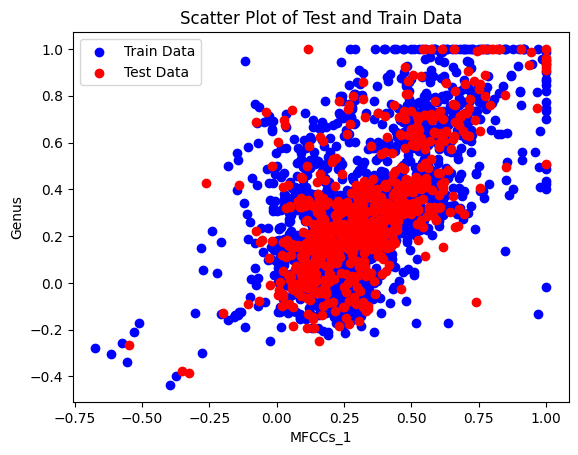

In [10]:
# splitting into test train
df = df.sample(frac=0.4, random_state=123)
print(df.shape)
X = df[['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3', 'MFCCs_ 4', 'MFCCs_ 5', 'MFCCs_ 6', 'MFCCs_ 7', 'MFCCs_ 8', 'MFCCs_9', 'MFCCs_10', 'MFCCs_11', 'MFCCs_12', 'MFCCs_13', 'MFCCs_14', 'MFCCs_15', 'MFCCs_16', 'MFCCs_17', 'MFCCs_18', 'MFCCs_19', 'MFCCs_20', 'MFCCs_21']].values
y = df['Genus']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
# X = X[:1000]
# y = y[:1000]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

plt.scatter(X_train[:, 0], X_train[:, 1], c='blue', label='Train Data')


plt.scatter(X_test[:, 0], X_test[:, 1], c='red', label='Test Data')

plt.xlabel('MFCCs_1')
plt.ylabel('Genus')
plt.legend(loc='best')
plt.title('Scatter Plot of Test and Train Data')
plt.show()

In [11]:
up_lim_k = 50
y_test_pred = []
k_vs_accuracy1 = {}

def predict(X, k):
    y_test_pred = []
    # For each point in the test set
    for xi in X:
        # dist btw xi and xti
        distances = [np.sqrt(np.sum((xti - xi) ** 2)) for xti in X_train]
        k_nearest_indices = []

        for _ in range(k):
            min_distance = float('inf')
            min_index = -1
            for i, distance in enumerate(distances):
                if distance < min_distance and i not in k_nearest_indices:
                    min_distance = distance
                    min_index = i
            k_nearest_indices.append(min_index)

        k_nearest_labels = [y_train[i] for i in k_nearest_indices]

        # Perform majority voting
        label_count = {}
        most_common_label = None
        max_count = 0

        for label in k_nearest_labels:
            if label in label_count:
                label_count[label] += 1
            else:
                label_count[label] = 1

            if label_count[label] > max_count:
                max_count = label_count[label]
                most_common_label = label

        y_test_pred.append(most_common_label)

    return y_test_pred

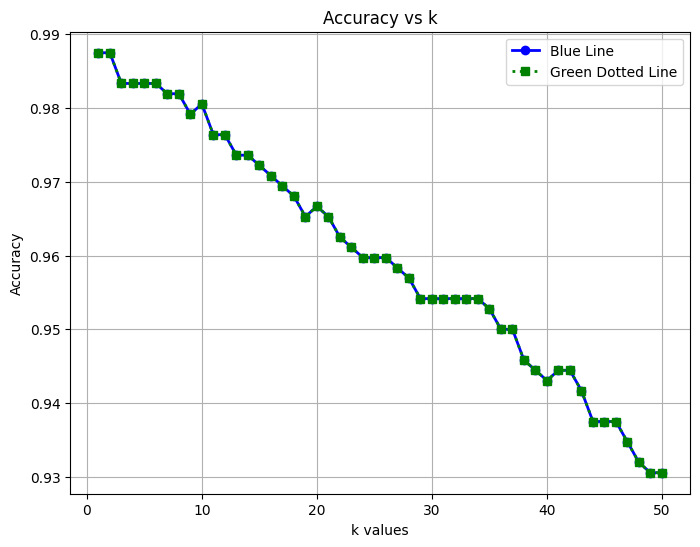

In [12]:
# Testing for each k
for k in range(1, up_lim_k+1):
    correct = 0
    y_test_pred = predict(X_test, k)
    # Testing value of each testing point
    for i in range(len(y_test_pred)):
        if(y_test_pred[i] == y_test[i]):
            correct += 1
    if len(y_test_pred) != 0:
        accuracy_test = correct/len(y_test_pred)
        k_vs_accuracy1[k] = accuracy_test

# print(k_vs_accuracy1)

# ==========================================================> PRINTING
accuracy_scores = list(k_vs_accuracy1.values())
k_values = list(k_vs_accuracy1.keys())
accuracy_values = list(k_vs_accuracy1.values())

plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracy_values, marker='o', linestyle='-', color='b', label='Blue Line', linewidth=2)
plt.plot(k_values, accuracy_values, marker='s', linestyle=':', color='g', label='Green Dotted Line', linewidth=2)

plt.title('Accuracy vs k')
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()

###KNN with Sklearn

In [13]:
#importing dataset
df = pd.read_csv("/content/Q1Data.csv")
df.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_9,MFCCs_10,...,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,Family,Genus,Species
0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,0.188654,...,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre
1,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,0.270958,...,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre
2,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,0.266064,...,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre
3,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,0.267279,...,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre
4,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,0.332695,...,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre


In [14]:
# splitting into test train
# df = df.sample(frac=0.3, random_state=123)
# print(df.shape)
X = df[['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3', 'MFCCs_ 4', 'MFCCs_ 5', 'MFCCs_ 6', 'MFCCs_ 7', 'MFCCs_ 8', 'MFCCs_9', 'MFCCs_10', 'MFCCs_11', 'MFCCs_12', 'MFCCs_13', 'MFCCs_14', 'MFCCs_15', 'MFCCs_16', 'MFCCs_17', 'MFCCs_18', 'MFCCs_19', 'MFCCs_20', 'MFCCs_21']].values
y = df['Genus']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
# X = X[:1000]
# y = y[:1000]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from collections import Counter

{1: 0.9937456567060459, 2: 0.9916608756080612, 3: 0.9916608756080612, 4: 0.990271021542738, 5: 0.9909659485753995, 6: 0.9895760945100764, 7: 0.9881862404447533, 8: 0.9861014593467686, 9: 0.9881862404447533, 10: 0.9861014593467686, 11: 0.9867963863794301, 12: 0.9861014593467686, 13: 0.985406532314107, 14: 0.9826268241834607, 15: 0.9819318971507992, 16: 0.9826268241834607, 17: 0.9833217512161223, 18: 0.9826268241834607, 19: 0.9833217512161223, 20: 0.9812369701181376, 21: 0.9819318971507992, 22: 0.980542043085476, 23: 0.980542043085476, 24: 0.980542043085476, 25: 0.9777623349548298, 26: 0.9777623349548298, 27: 0.9756775538568451, 28: 0.9763724808895066, 29: 0.9742876997915219, 30: 0.9756775538568451, 31: 0.9735927727588604, 32: 0.9742876997915219, 33: 0.9728978457261988, 34: 0.9742876997915219, 35: 0.9701181375955524, 36: 0.970813064628214, 37: 0.970813064628214, 38: 0.970813064628214, 39: 0.9701181375955524, 40: 0.9722029186935371, 41: 0.9715079916608756, 42: 0.9715079916608756, 43: 0.97

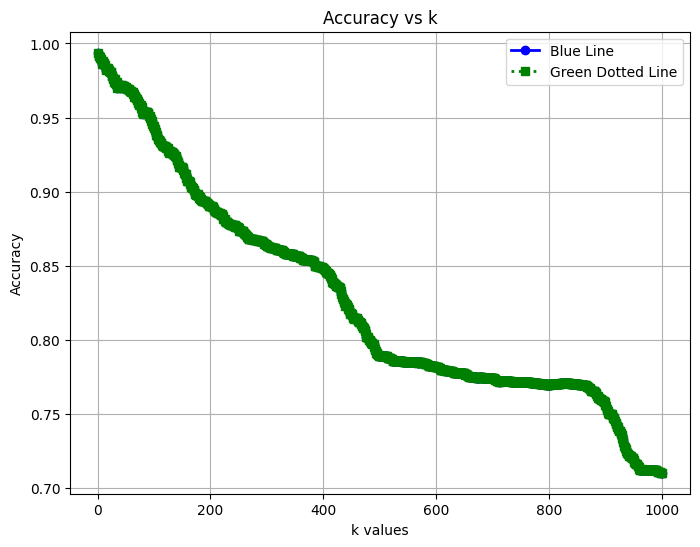

In [16]:
up_lim_k1 = 1000
y_test_pred1 = []
k_vs_accuracy2 = {}

for k in range(1, up_lim_k1+1):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    knn_predictions = knn_classifier.predict(X_test)
    knn_accuracy = accuracy_score(y_test, knn_predictions)
    k_vs_accuracy2[k] = knn_accuracy

print(k_vs_accuracy2)

accuracy_scores = list(k_vs_accuracy2.values())

k_values = list(k_vs_accuracy2.keys())
accuracy_values = list(k_vs_accuracy2.values())


plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracy_values, marker='o', linestyle='-', color='b', label='Blue Line', linewidth=2)
# plt.plot(k_values, accuracy_values, marker='x', linestyle='--', color='r', label='Red Dashed Line', linewidth=2)
plt.plot(k_values, accuracy_values, marker='s', linestyle=':', color='g', label='Green Dotted Line', linewidth=2)

plt.title('Accuracy vs k')
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()

## Putting all togather

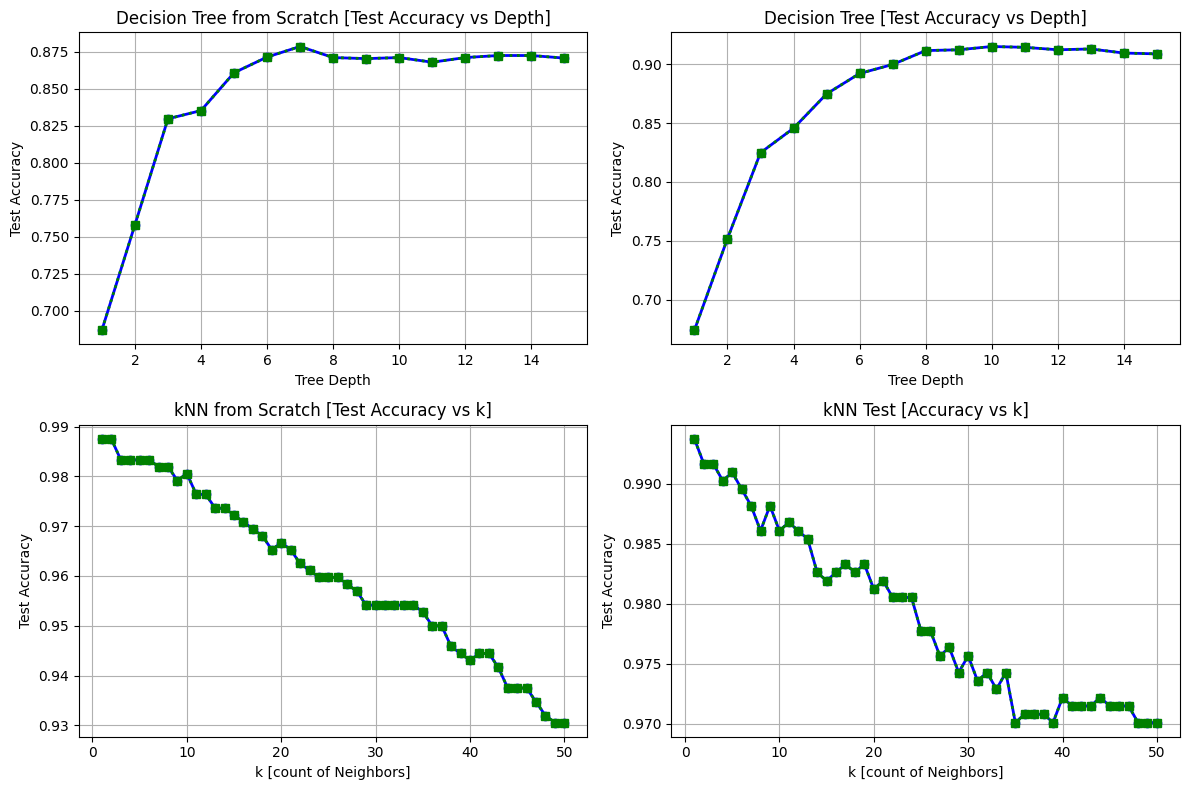

In [19]:
plt.figure(figsize=(12, 8))


plt.subplot(2, 2, 1)
# print(len(depths), len(list(depth_vs_accuracy1.values())))
plt.plot(depths, list(depth_vs_accuracy1.values()), marker='o', linestyle='-', color='b', label='Scratch', linewidth=2)
plt.plot(depths, list(depth_vs_accuracy1.values()), marker='s', linestyle=':', color='g', label='Green Dotted Line', linewidth=2)
plt.title('Decision Tree from Scratch [Test Accuracy vs Depth]')
plt.xlabel('Tree Depth')
plt.ylabel('Test Accuracy')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(depths, depth_vs_accuracy2, marker='o', linestyle='-', color='b', label='Scratch', linewidth=2)
plt.plot(depths, depth_vs_accuracy2, marker='s', linestyle=':', color='g', label='Green Dotted Line', linewidth=2)
plt.title('Decision Tree [Test Accuracy vs Depth]')
plt.xlabel('Tree Depth')
plt.ylabel('Test Accuracy')
plt.grid(True)


plt.subplot(2, 2, 3)
plt.plot(list(range(1,51)), list(k_vs_accuracy1.values()), marker='o', linestyle='-', color='b', label='Scratch', linewidth=2)
plt.plot(list(range(1,51)), list(k_vs_accuracy1.values()), marker='s', linestyle=':', color='g', label='Green Dotted Line', linewidth=2)
plt.title('kNN from Scratch [Test Accuracy vs k]')
plt.xlabel('k [count of Neighbors]')
plt.ylabel('Test Accuracy')
plt.grid(True)


plt.subplot(2, 2, 4)
plt.plot(k_values[:50], list(k_vs_accuracy2.values())[:50], marker='o', linestyle='-', color='b', label='Scratch', linewidth=2)
plt.plot(k_values[:50], list(k_vs_accuracy2.values())[:50], marker='s', linestyle=':', color='g', label='Green Dotted Line', linewidth=2)
plt.title('kNN Test [Accuracy vs k]')
plt.xlabel('k [count of Neighbors]')
plt.ylabel('Test Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()


# **REPORT**

## Comparing Scratch vs Inbuilt Classifiers:

### Decision Tree:

1. Both the custom and inbuilt Decision Tree classifiers show very similar performance trends.
2. The accuracy increases with depth initially, then levels off, suggesting that a deeper tree does not necessarily result in better performance on this dataset.
3. This is due to overfitting at higher depths, where the tree starts to learn the noise in the training data instead of general patterns.

### kNN Classifier:
1. Both the custom and inbuilt Decision Tree classifiers show very similar performance trends.
2. the custom and inbuilt kNN classifiers show similar trends in accuracy relative to the number of neighbors.
3. There is a notable decline in performance as the number of neighbors increases beyond a certain point, which may be due to the model considering too much of the surrounding context, thus blurring the decision boundaries between classes.
